In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

### 함수정의

In [11]:
from sklearn.preprocessing import PolynomialFeatures

def make_as_poly(X,degree):
    model_poly = PolynomialFeatures(degree=degree)
    X_poly = model_poly.fit_transform(X)
    return np.int64(X_poly)



### 전처리

,time
Date,
1927-12,0
1928-01,1
1928-02,2
1928-03,3
1928-04,4
...,...
2020-07,1111
2020-08,1112
2020-09,1113


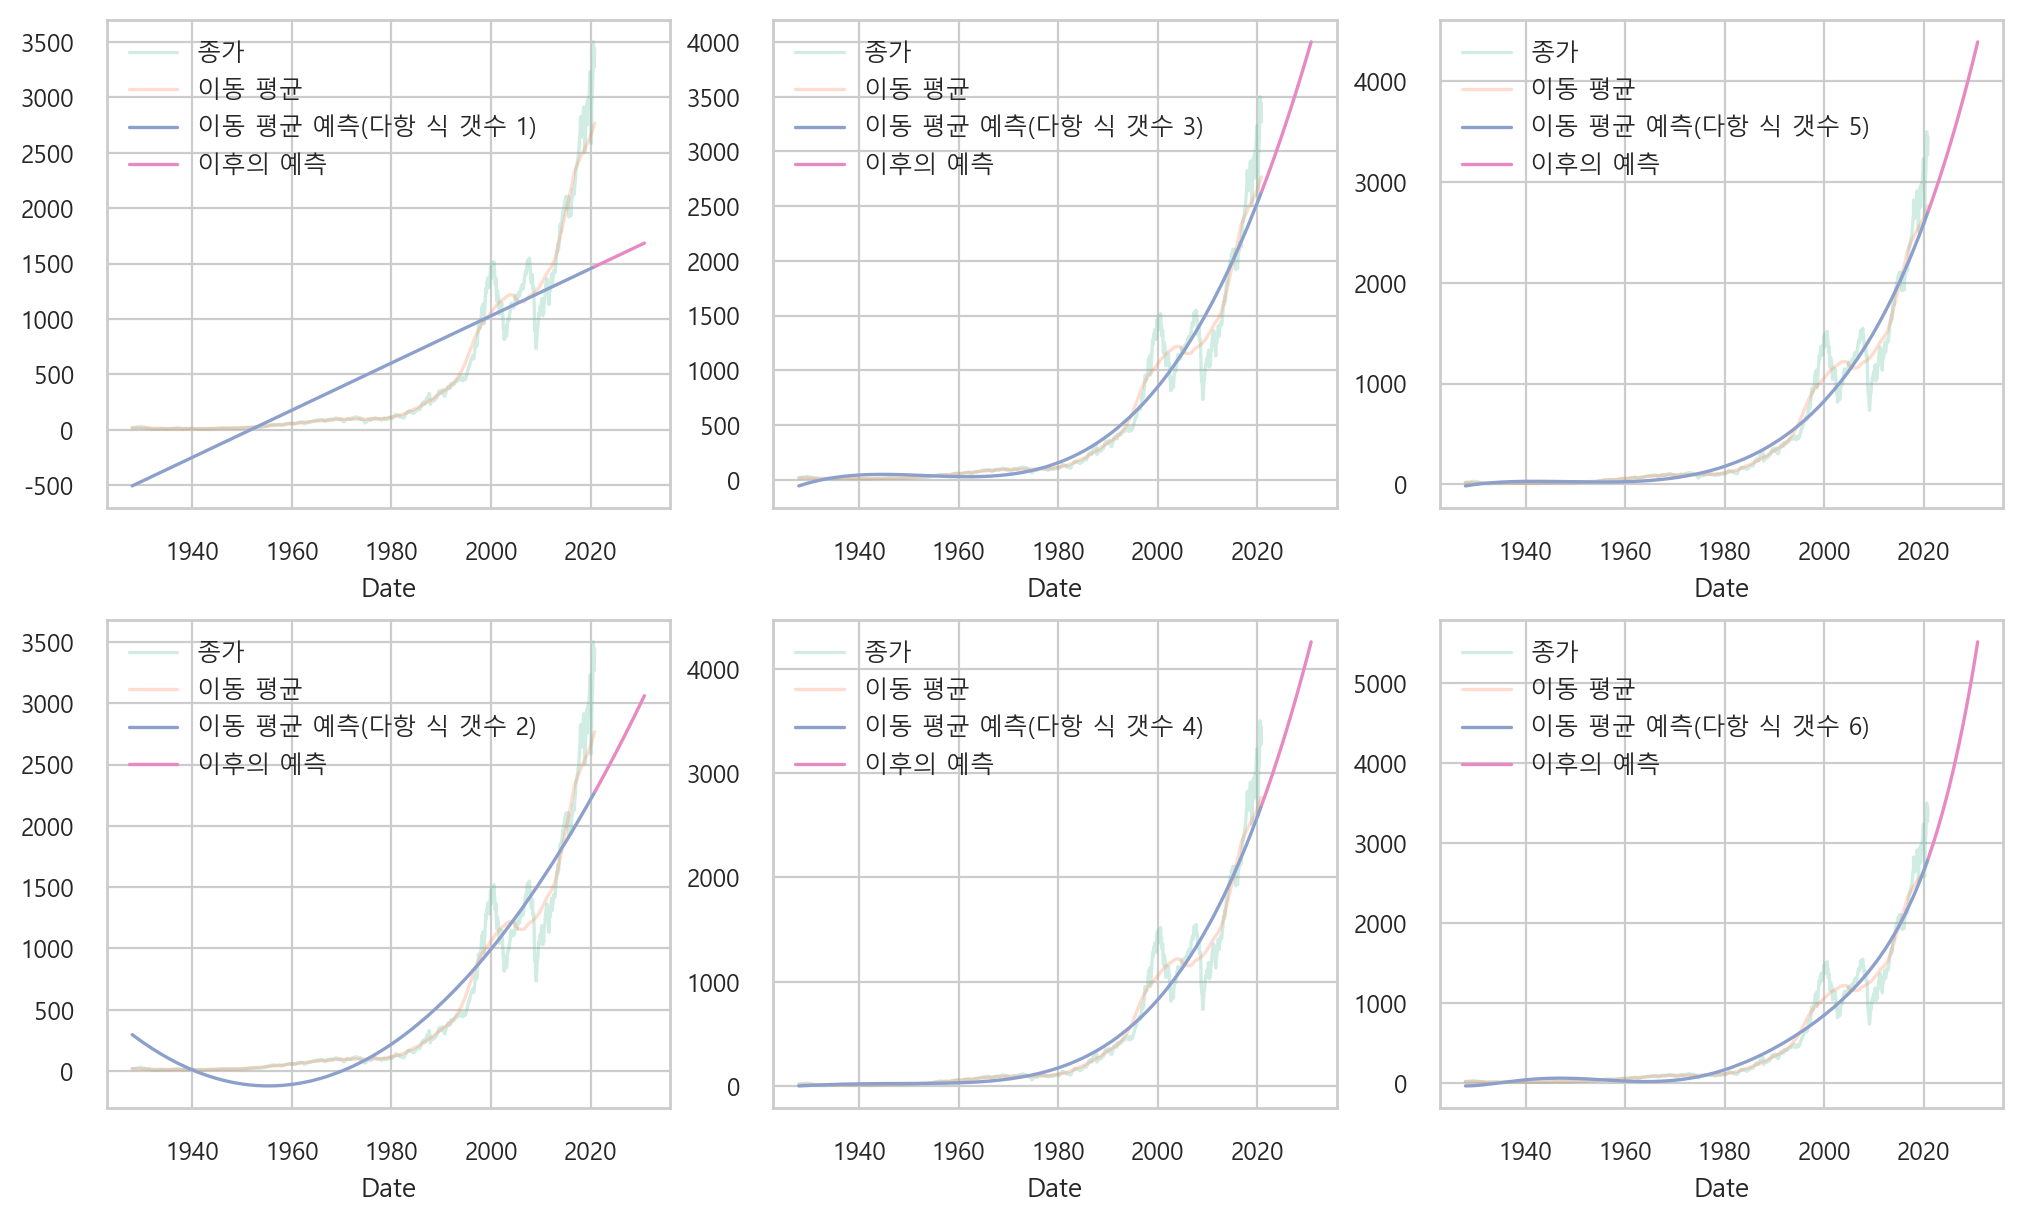

In [12]:
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

# 월말 데이터로 리샘플링
snp_500_month_end = snp_500.resample('M').last()

# 인덱스를 기간으로 변환
snp_500_month_end.index = snp_500_month_end.index.to_period('M')
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))

# 이동 평균 구하기
trend_500 = snp_500_month_end["Adj Close"]
trend_500_trend = trend_500.rolling(window=100, center=True, min_periods=6).mean()

# 데이터 준비
X = pd.DataFrame(snp_500_month_end["time"])
y = trend_500_trend

# 다항 특성 생성
X_poly = make_as_poly(X, degree=2)

fig, ax = plt.subplots(2,3,figsize=(10,6))
ind_list = [[j,k] for k in range(3) for j in range(2)]

dict_date_afterword = {}
for i in range(1, 121): # 추가로 10년간 데이터
    dict_date_afterword[X.index[-1] + i] = int(X.iloc[-1]) + i

df_after = pd.DataFrame(data=dict_date_afterword.values(),
                        index=dict_date_afterword.keys(),
                        columns=["time"])

for i in range(1,7):
    model = LinearRegression()
    model.fit(make_as_poly(X,i), y)
    pred = model.predict(make_as_poly(X,i))
    pred_after = model.predict(make_as_poly(df_after,i))

    r = ind_list[i-1][0]
    c = ind_list[i-1][1]
    

    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500.values,
                 alpha = 0.3,
                 label = "종가",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500_trend.values,
                 alpha = 0.3,
                 label = "이동 평균",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                y = pred,
                label=f'이동 평균 예측(다항 식 갯수 {i})',
                ax=ax[r][c])
    sns.lineplot(x = df_after.index.astype("datetime64"),
                y = pred_after,
                label=f'이후의 예측',
                ax=ax[r][c])
    
X

<AxesSubplot: xlabel='Date'>

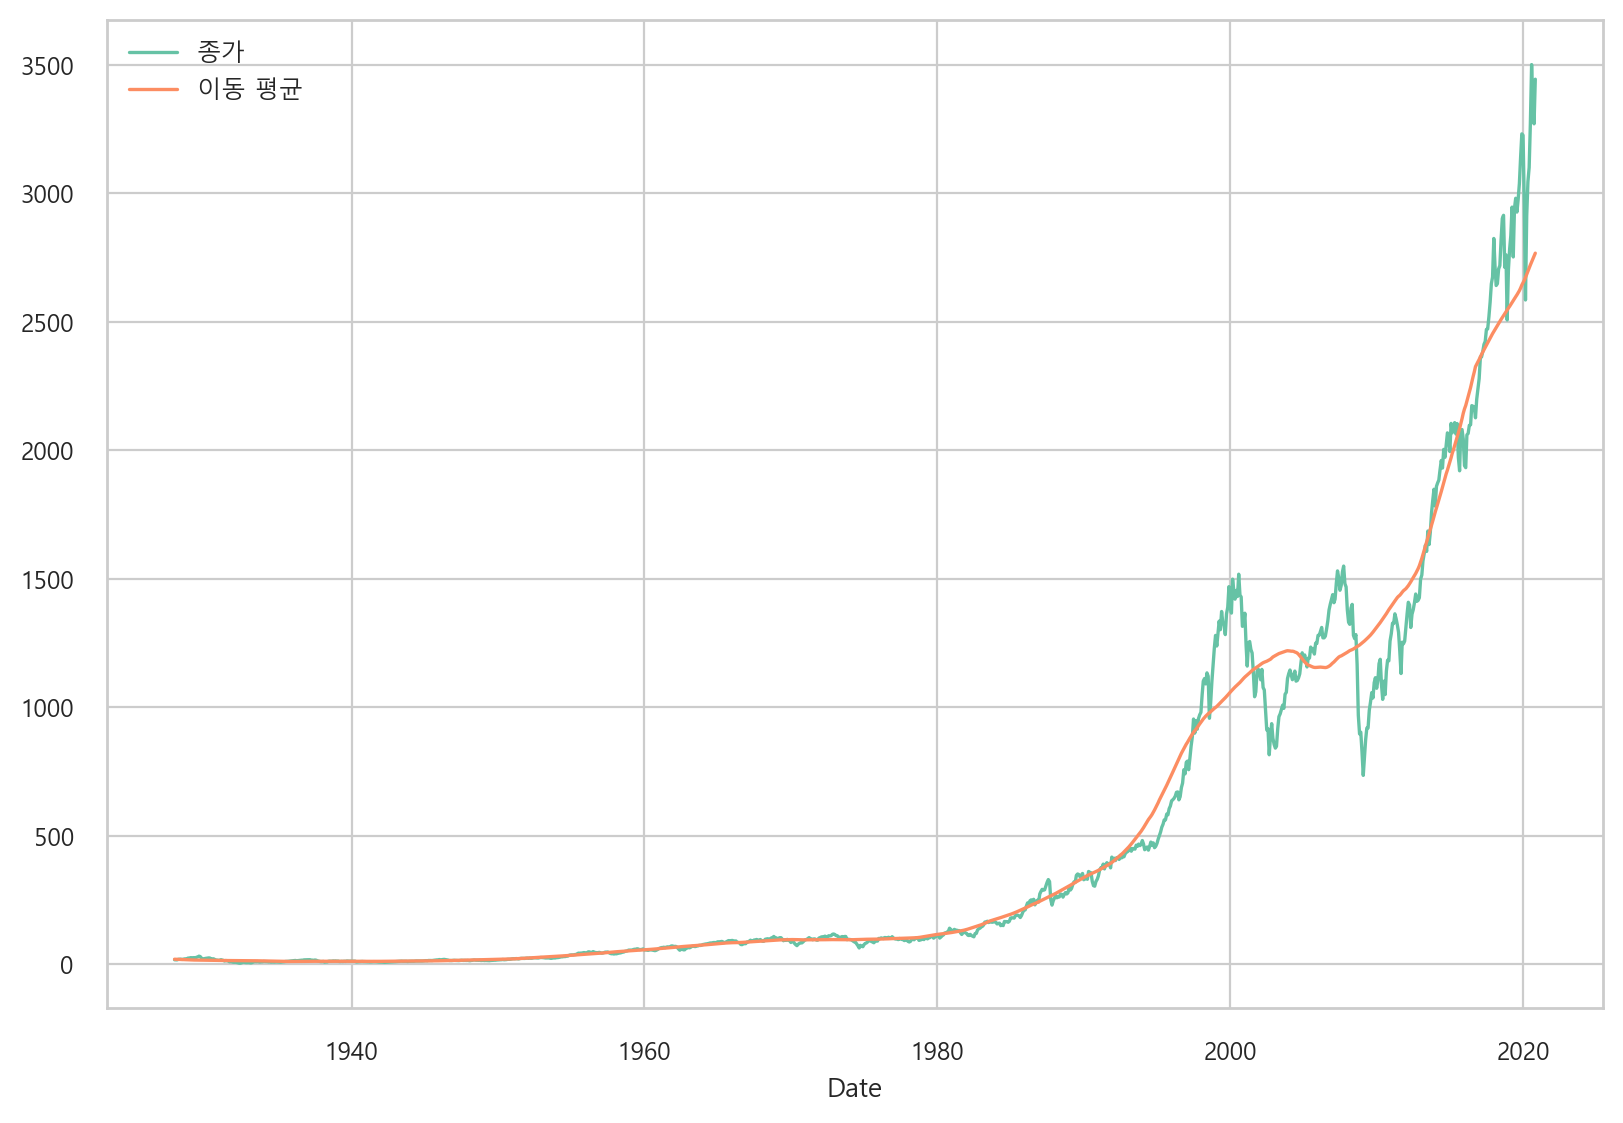

In [13]:
fig, ax = plt.subplots()

sns.lineplot(x = trend_500.index.astype("datetime64"),
             y = trend_500.values,
             label = "종가")

sns.lineplot(x = trend_500_trend.index.astype("datetime64"),
             y = trend_500_trend.values,
             label = "이동 평균")

In [14]:
X = snp_500_month_end[['time']] # ex) 1, 2, 3 ,...
y = trend_500_trend # 각 시간별 추세

In [15]:
# 다항 특성 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
np.int64(X_poly)

# 2차
'''
array([[      1,       0,       0],
       [      1,       1,       1],
       [      1,       2,       4],
       ...,
       [      1,    1113, 1238769],
       [      1,    1114, 1240996],
       [      1,    1115, 1243225]], dtype=int64)
'''

'\narray([[      1,       0,       0],\n       [      1,       1,       1],\n       [      1,       2,       4],\n       ...,\n       [      1,    1113, 1238769],\n       [      1,    1114, 1240996],\n       [      1,    1115, 1243225]], dtype=int64)\n'

<AxesSubplot: xlabel='Date'>

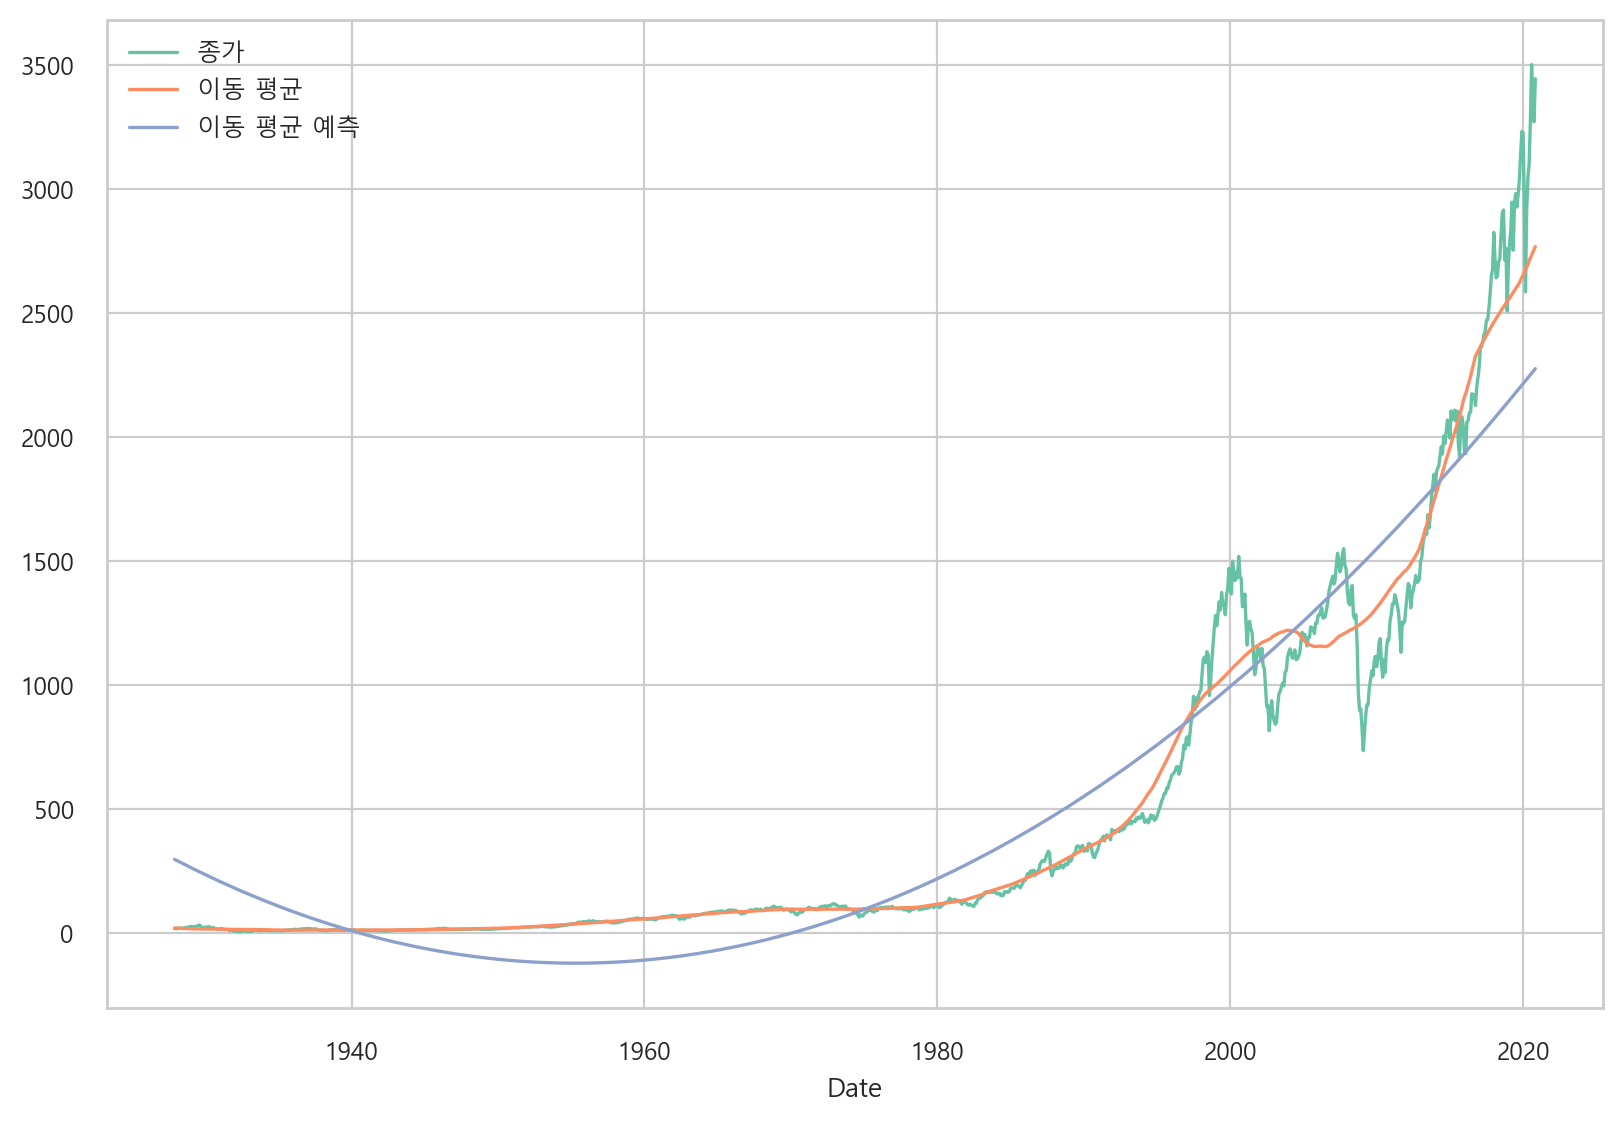

In [16]:

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측
pred = model.predict(X_poly)

# 결과 플롯팅
fig, ax = plt.subplots()

sns.lineplot(x = trend_500.index.astype("datetime64"),
             y = trend_500.values,
             label = "종가")

sns.lineplot(x = trend_500.index.astype("datetime64"),
             y = trend_500_trend.values,
             label = "이동 평균")


sns.lineplot(x = trend_500.index.astype("datetime64"),
             y = pred,
             label='이동 평균 예측')


In [17]:
dict_date_afterword = {}
for i in range(1, 121): # 추가로 10년간 데이터
    dict_date_afterword[X.index[-1] + i] = int(X.iloc[-1]) + i

df_after = pd.DataFrame(data=dict_date_afterword.values(),
                        index=dict_date_afterword.keys(),
                        columns=["time"])

NameError: name 'make_polys' is not defined

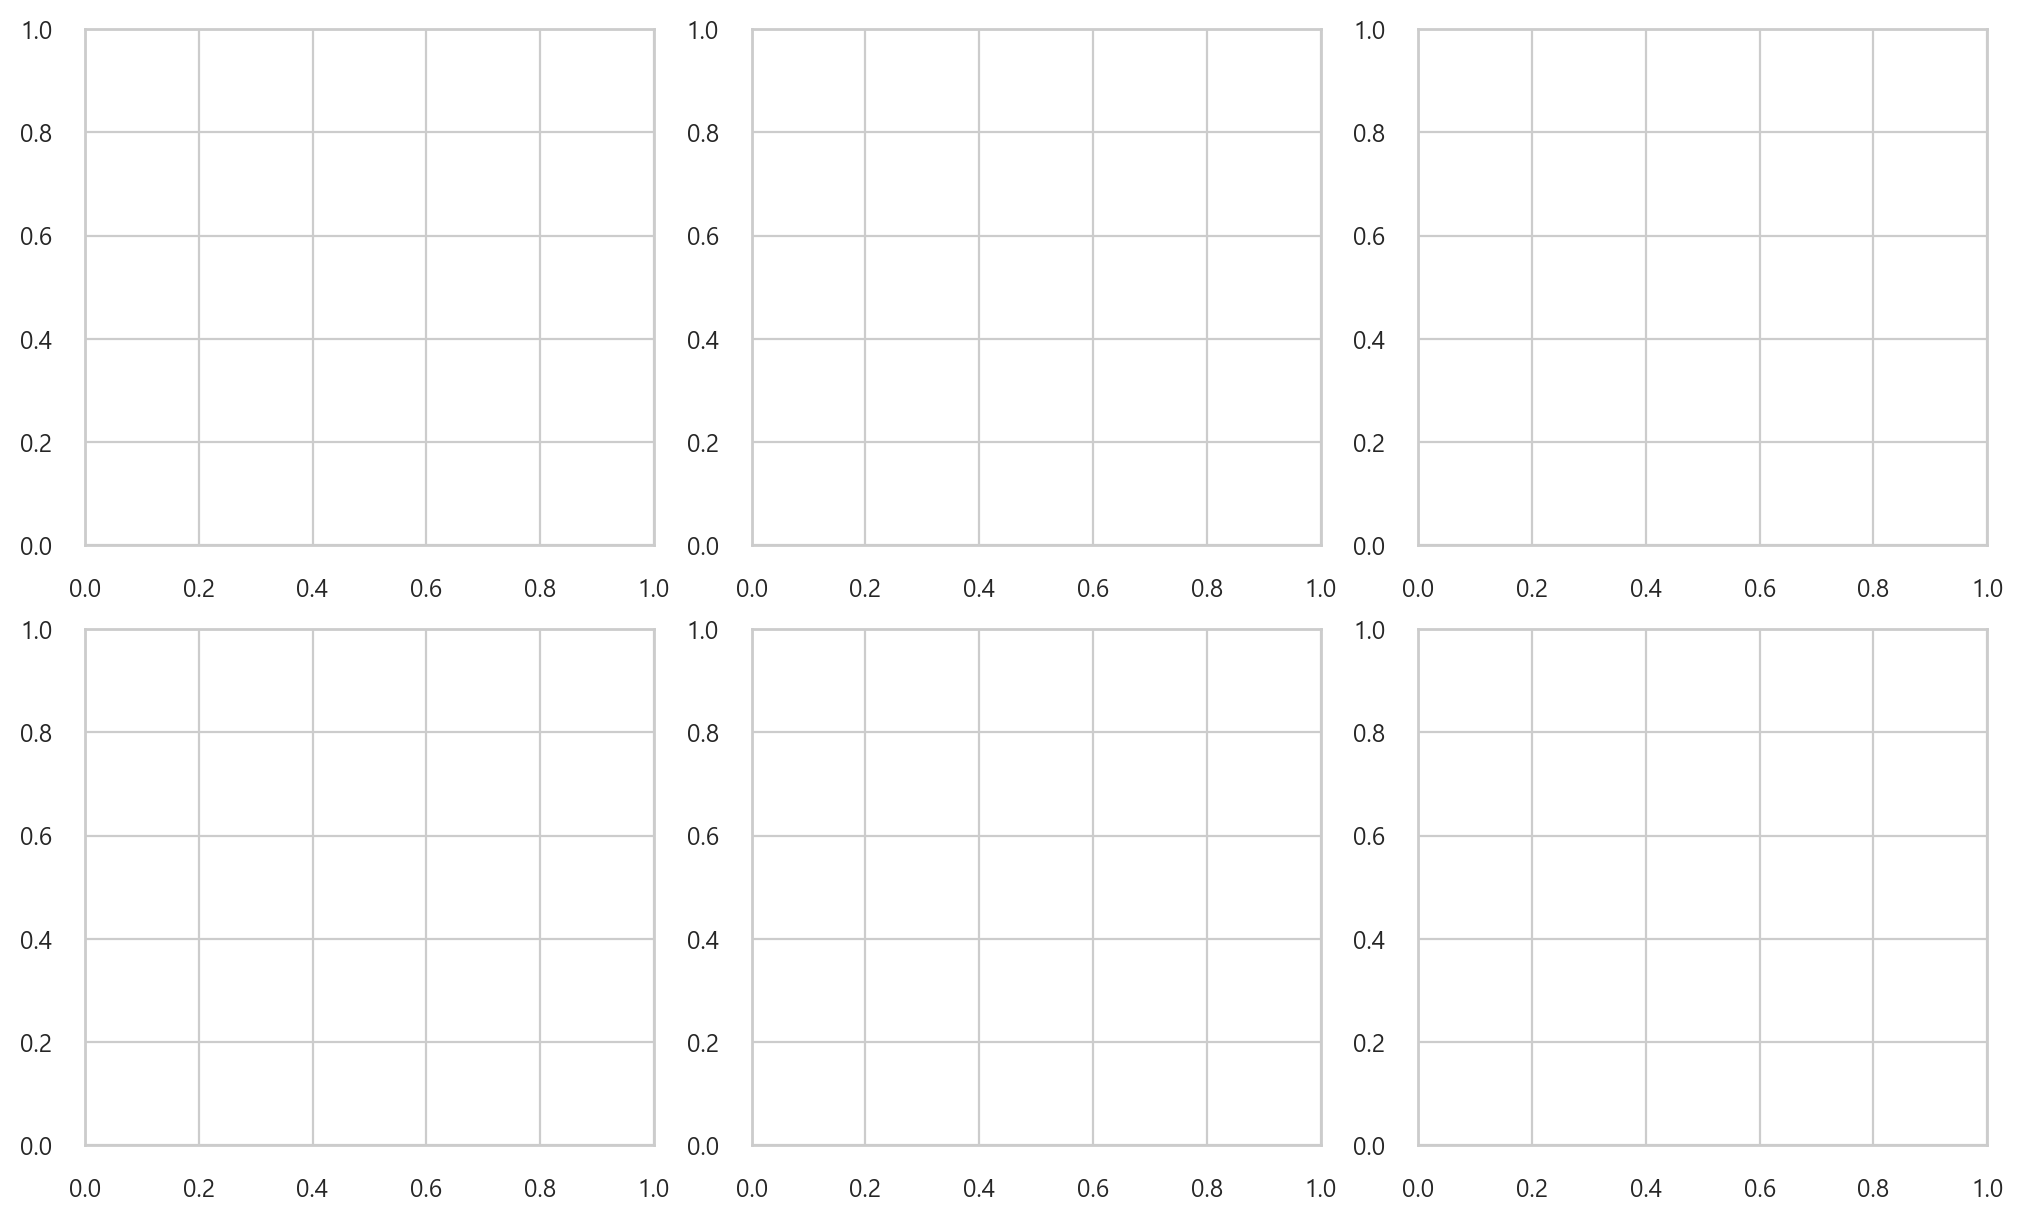

In [18]:
fig, ax = plt.subplots(2,3,figsize=(10,6))
ind_list = [[j,k] for k in range(3) for j in range(2)]

for i in range(1,7):
    model = LinearRegression()
    model.fit(make_polys(X,i), y)
    pred = model.predict(make_polys(X,i))
    pred_after = model.predict(make_polys(df_after,i))

    r = ind_list[i-1][0]
    c = ind_list[i-1][1]
    

    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500.values,
                 alpha = 0.3,
                 label = "종가",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500_trend.values,
                 alpha = 0.3,
                 label = "이동 평균",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                y = pred,
                label=f'이동 평균 예측(다항 식 갯수 {i})',
                ax=ax[r][c])
    sns.lineplot(x = df_after.index.astype("datetime64"),
                y = pred_after,
                label=f'이후의 예측',
                ax=ax[r][c])


In [ ]:
snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

snp_500_month_end = snp_500.resample('M').last()

snp_500_month_end.index = snp_500_month_end.index.to_period()
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))


trend_500 = snp_500_month_end["Adj Close"]
# 추세 구하는 함수
trend_500_trend = snp_500_month_end["Adj Close"].rolling(
    window=100,
    center=True,
    min_periods=6,
).mean()

In [ ]:
test = snp_500_month_end[["Adj Close"]].tail(10).copy()
test["trend"] = test.rolling(window=5,center=True,).mean()
test

,Adj Close,trend
Date,,
2020-02,2954.219971,NaN
2020-03,2584.590088,NaN
2020-04,2912.429932,2919.168018
2020-05,3044.310059,2982.548047
2020-06,3100.290039,3165.692041
2020-07,3271.120117,3255.806055
2020-08,3500.310059,3300.936035
2020-09,3363.000000,3369.566016
2020-10,3269.959961,NaN


<AxesSubplot: xlabel='Date'>

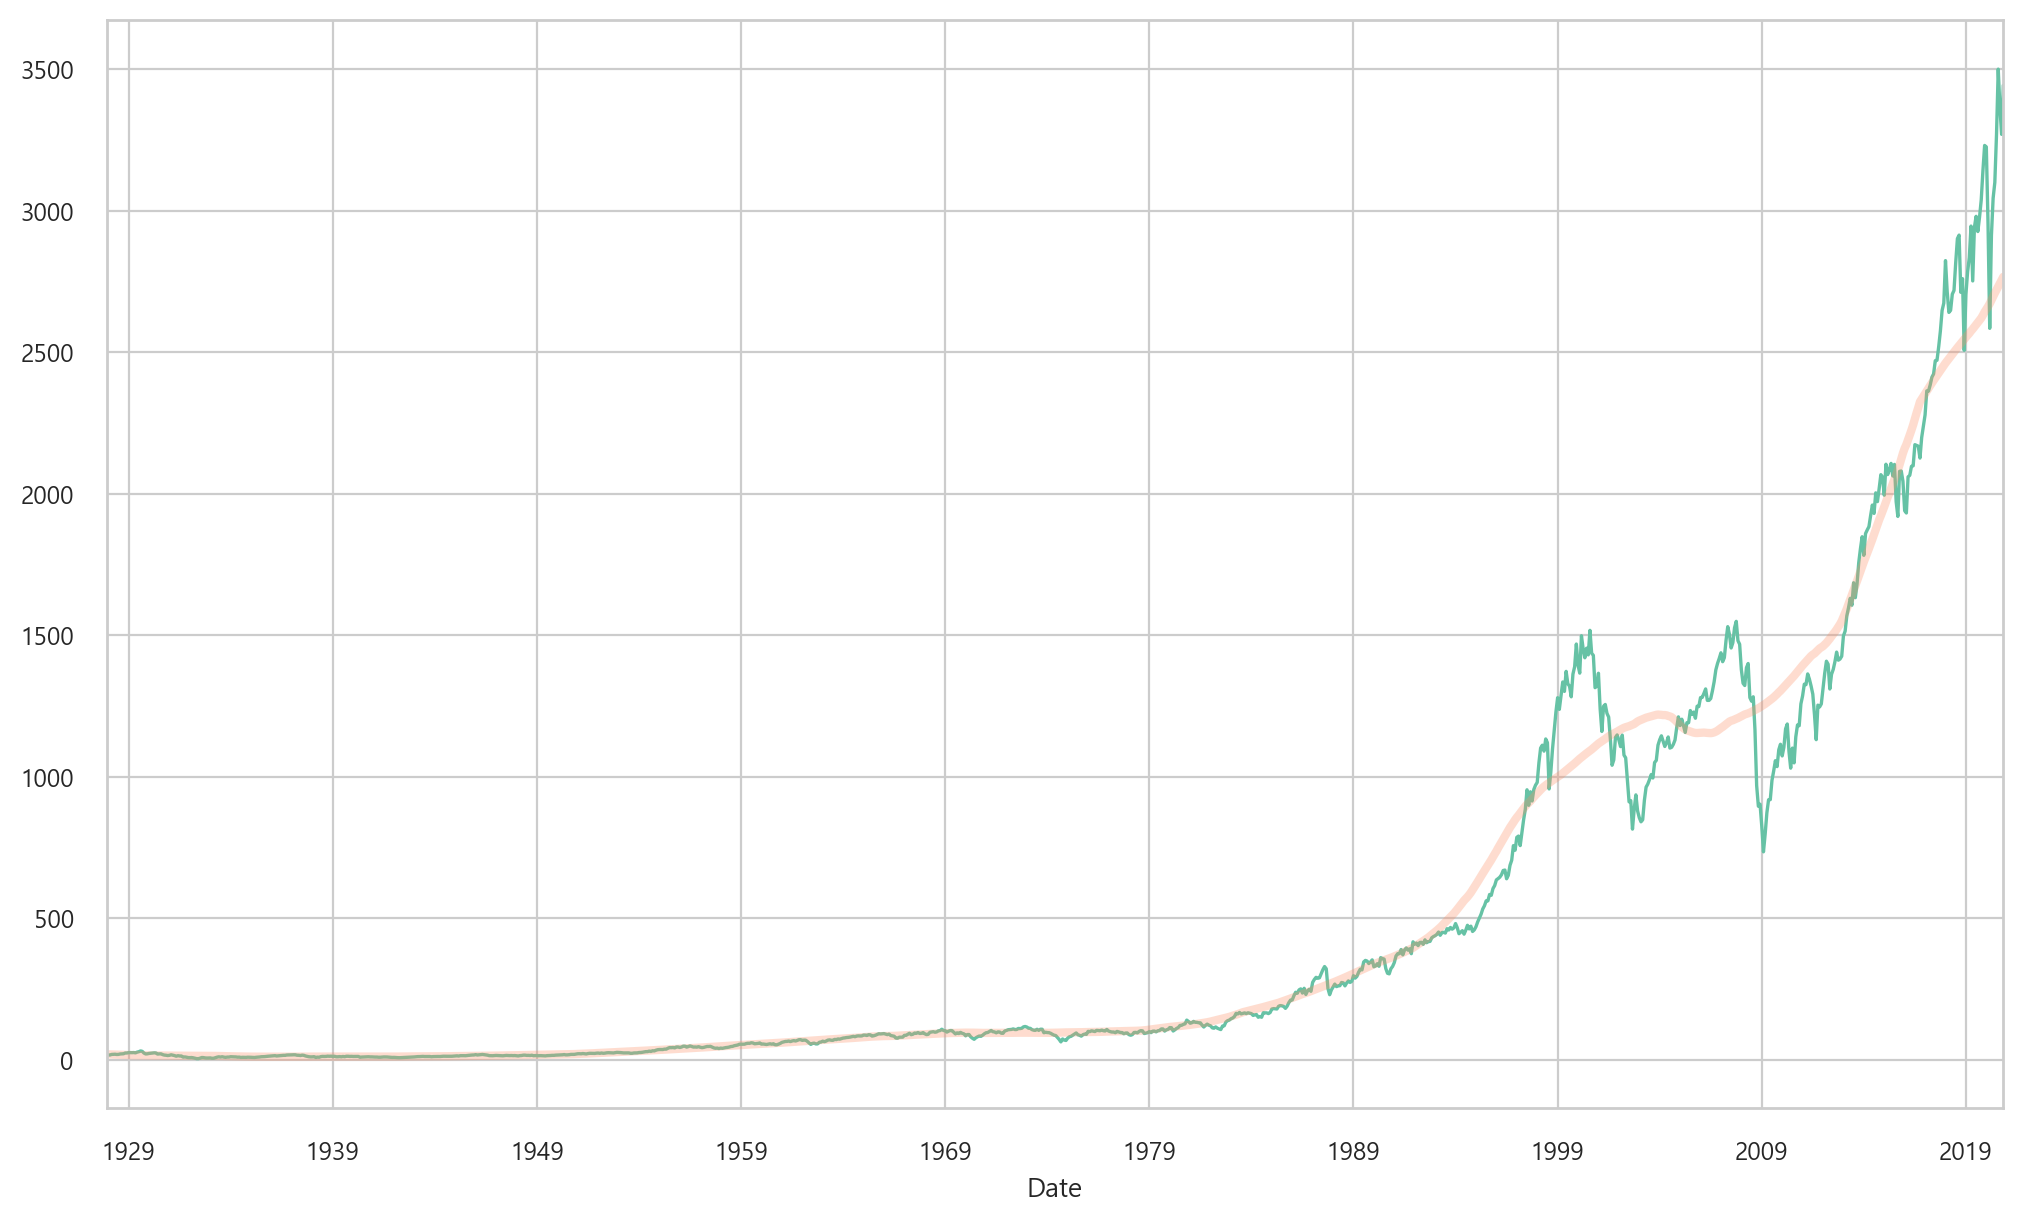

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

trend_500.plot(ax=ax)
trend_500_trend.plot(ax=ax, linewidth = 3, alpha = 0.3)

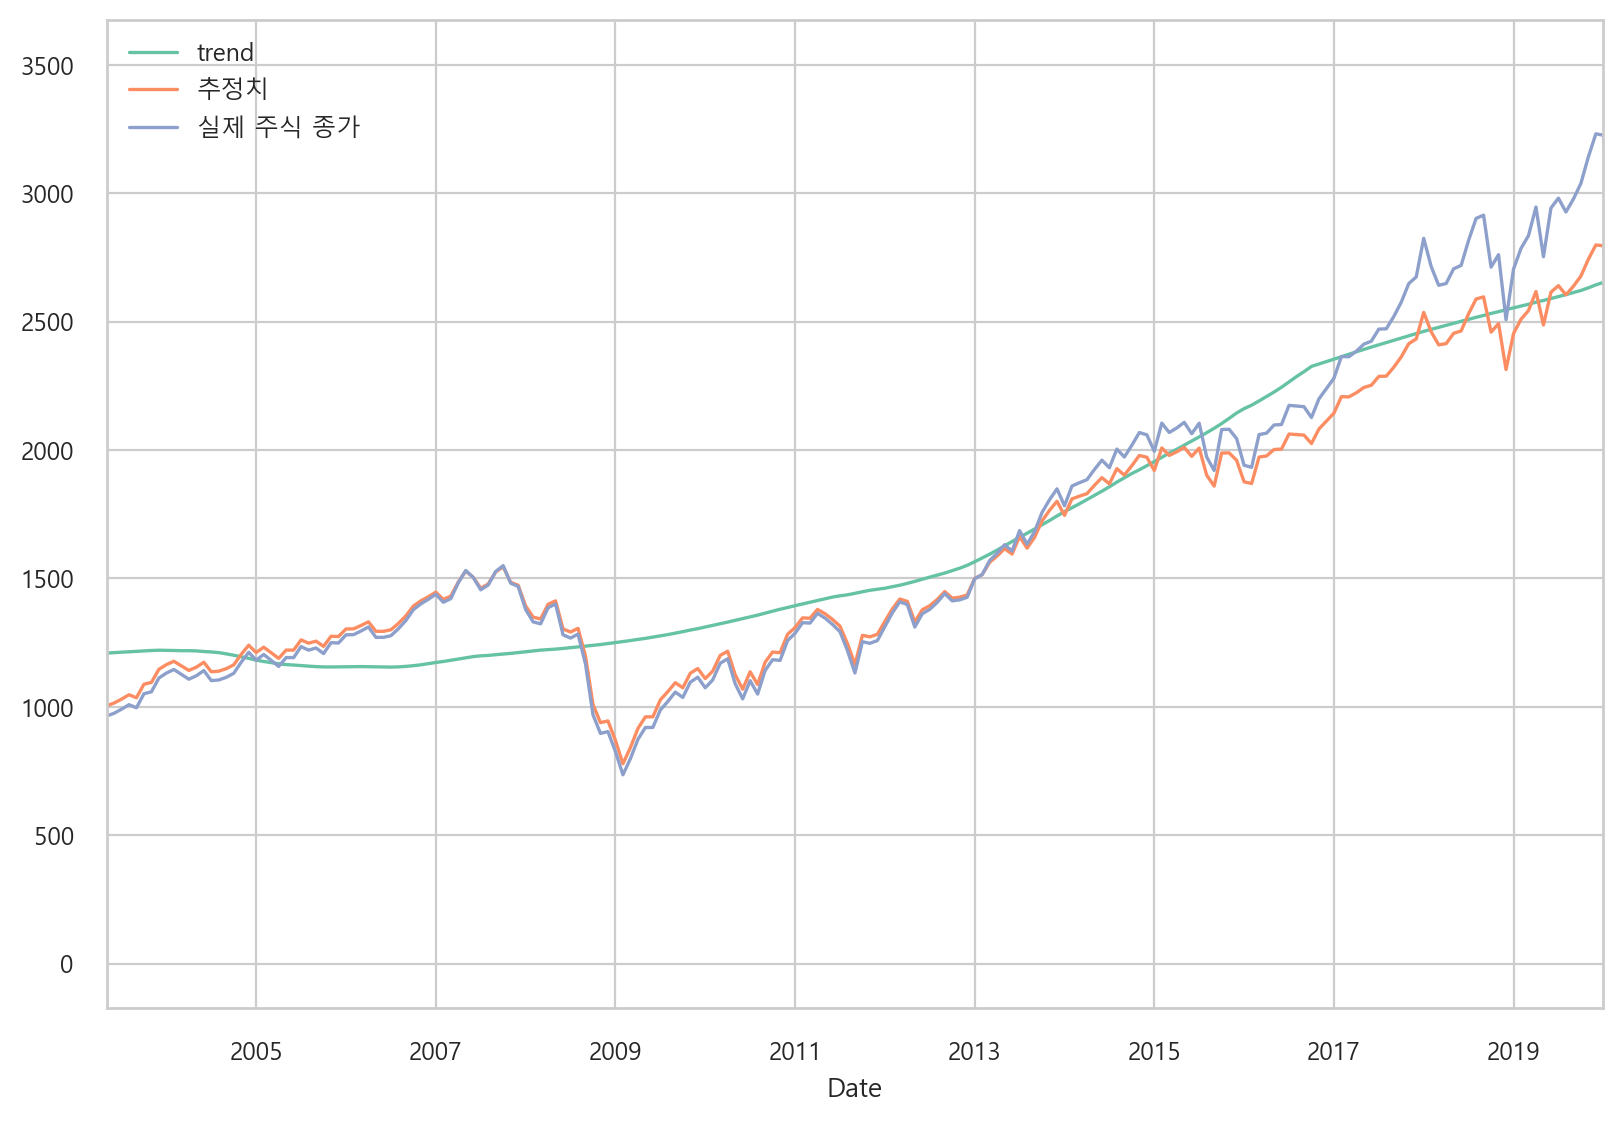

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(trend_500).copy()
y = pd.Series(trend_500_trend).copy() 
y.name = "trend"

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
pred = model.predict(X_poly)

# Plot the predictions
fig, ax = plt.subplots()

y.plot(ax = ax) # 이동 평균선
ax.plot(y.index,pred, label='추정치') 
ax.plot(y.index,X,label='실제 주식 종가')
ax.set(xlim=[400,600])#, ylim=[75,300])
ax.legend();

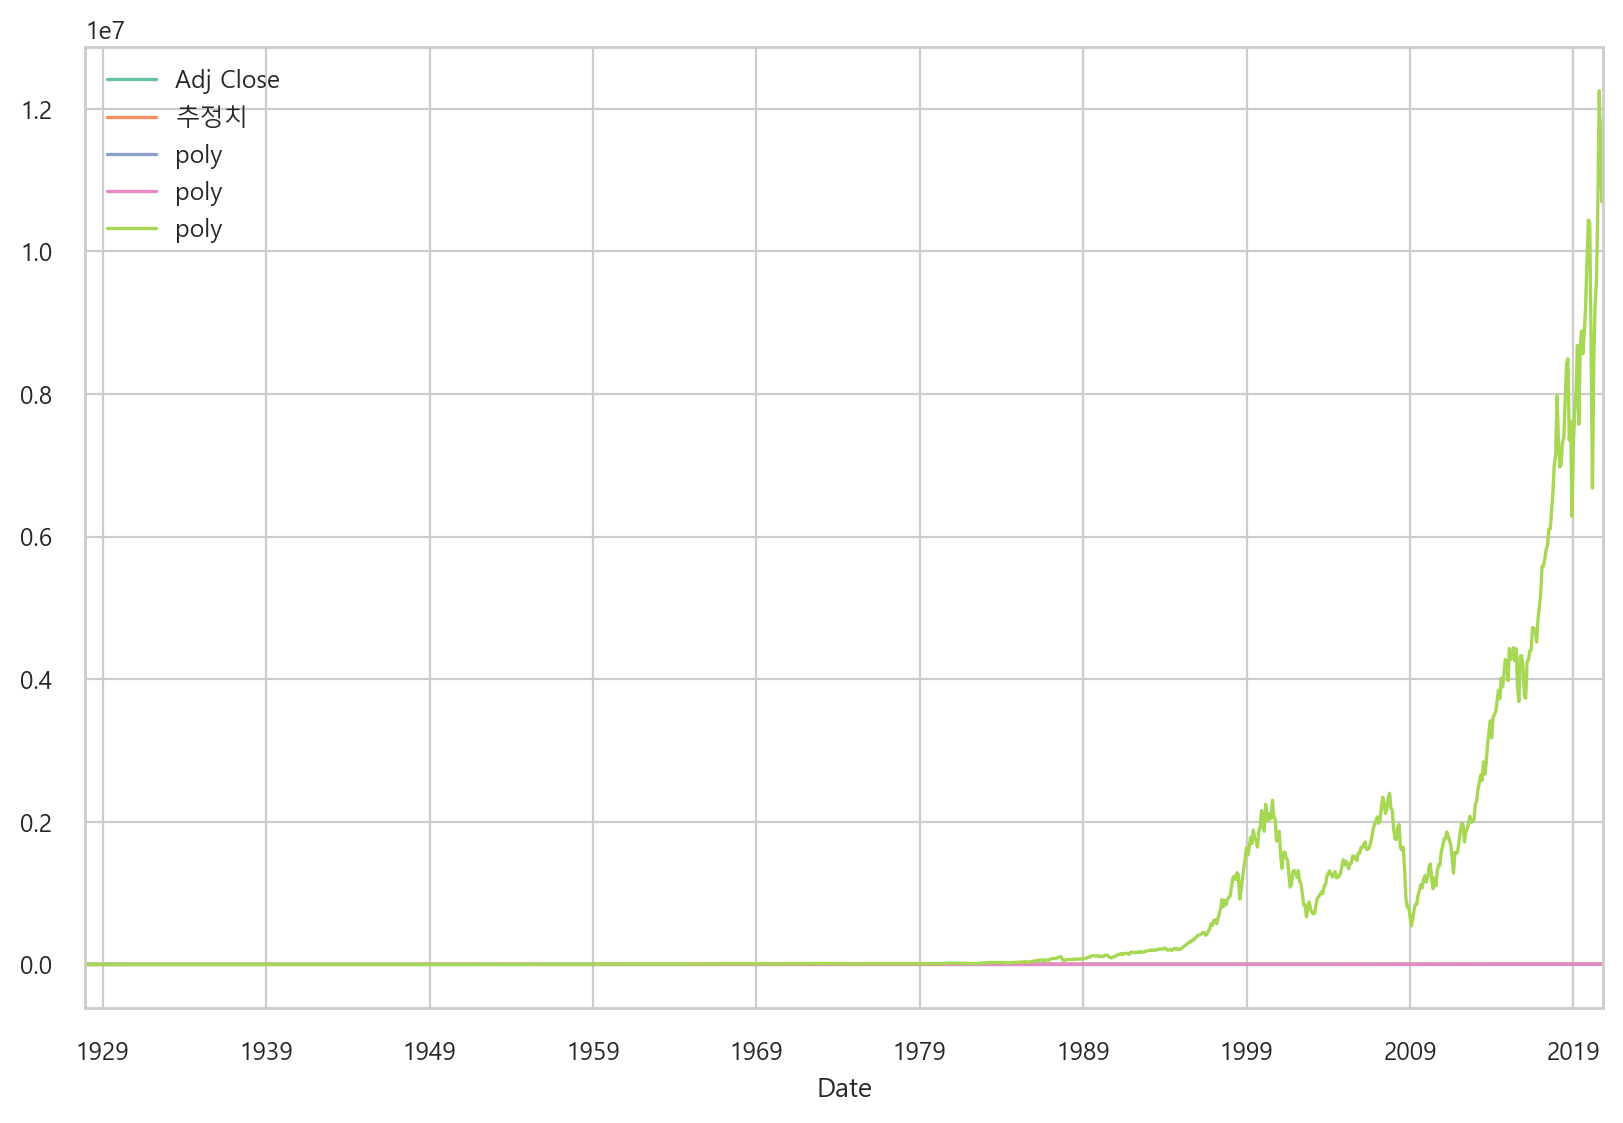

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = pd.DataFrame(trend_500).copy()
y = pd.DataFrame(trend_500_trend).copy() 
y.name = "trend"

# Create polynomial features
poly = PolynomialFeatures(degree=2)
y_poly = poly.fit_transform(y)

# Fit a linear regression model
model = LinearRegression()
model.fit(y_poly, y)

# Predict using the model
pred = model.predict(X_poly)

# Plot the predictions
fig, ax = plt.subplots()

y.plot(ax = ax) # 이동 평균선
ax.plot(y.index,pred, label='추정치') 
ax.plot(y.index,X_poly,label='poly')
# ax.set(xlim=[400,600])#, ylim=[75,300])
ax.legend();

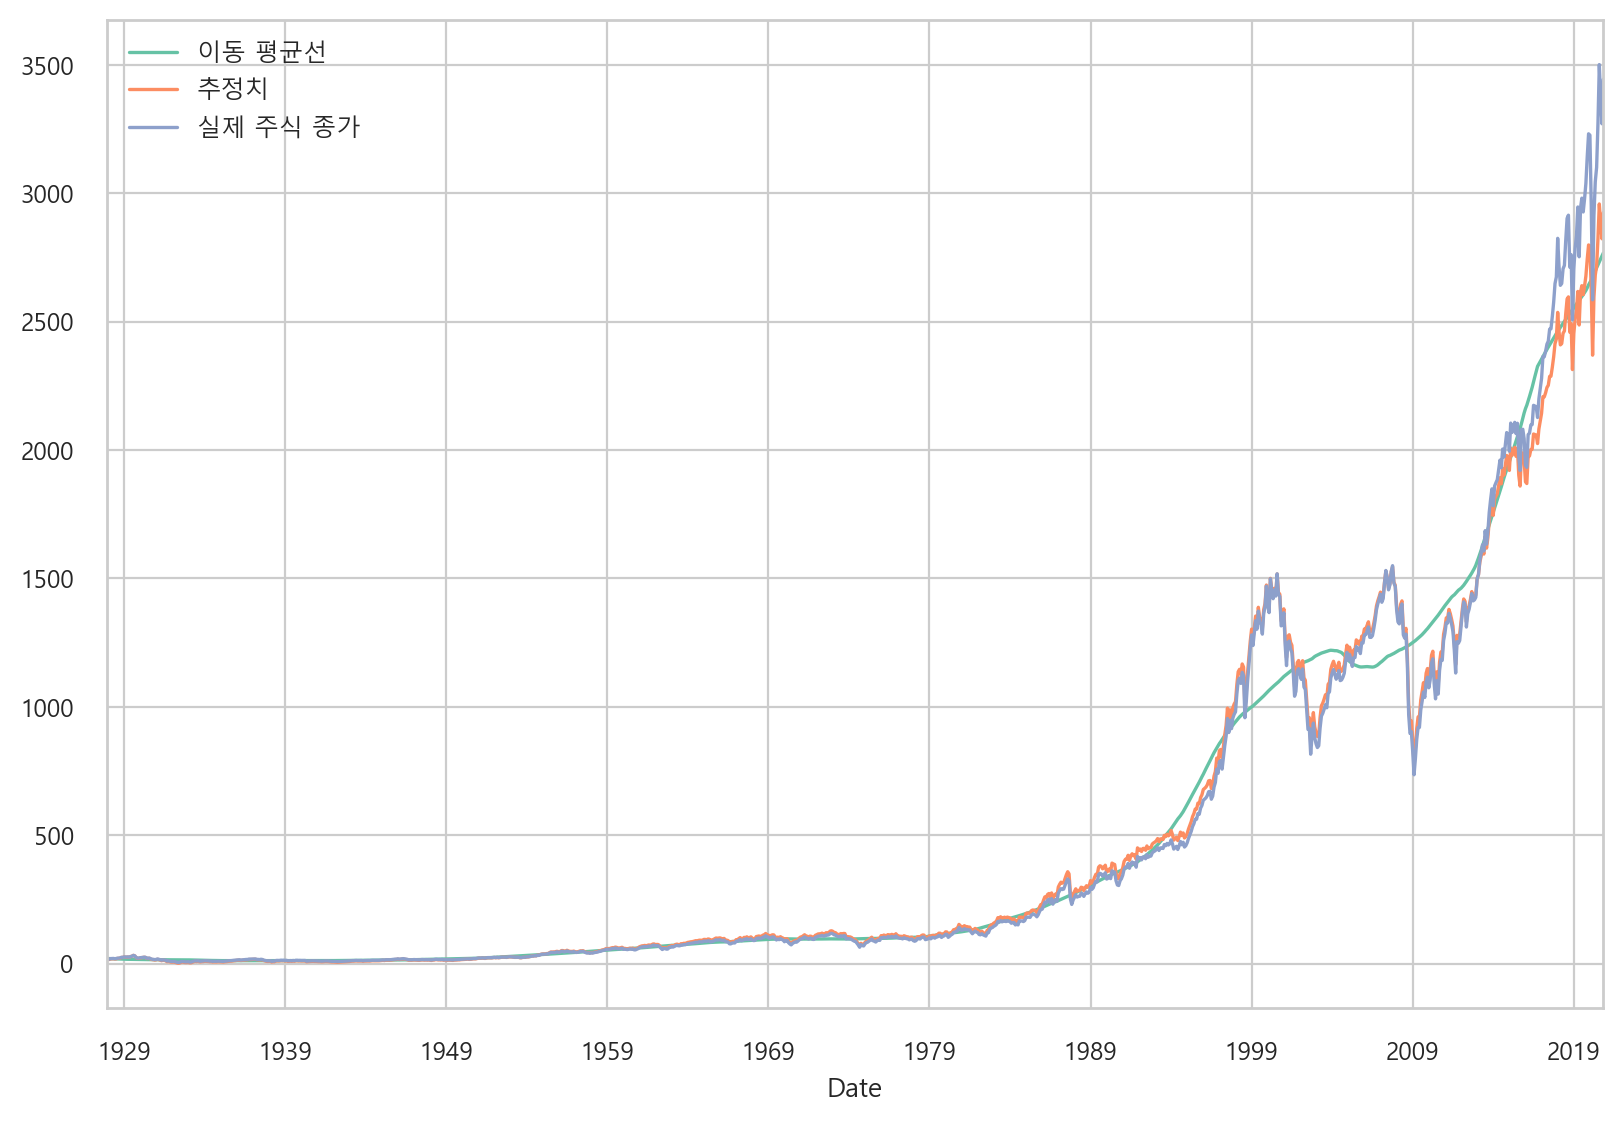

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

# 월말 데이터로 리샘플링
snp_500_month_end = snp_500.resample('M').last()

# 인덱스를 기간으로 변환
snp_500_month_end.index = snp_500_month_end.index.to_period('M')
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))

# 이동 평균 구하기
trend_500 = snp_500_month_end["Adj Close"]
trend_500_trend = trend_500.rolling(window=100, center=True, min_periods=6).mean()

# 데이터 준비
X = pd.DataFrame(trend_500)
y = trend_500_trend

# 결측치 제거
X = X.dropna()
y = y.dropna()

# 다항 특성 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_poly, y)

# 예측
pred = model.predict(X_poly)

# 결과 플롯팅
fig, ax = plt.subplots()

y.plot(ax=ax, label='이동 평균선')  # 이동 평균선
ax.plot(y.index, pred, label='추정치')  # 추정치
ax.plot(X.index, X, label='실제 주식 종가')  # 실제 종가
ax.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

In [ ]:

# 월말 데이터로 리샘플링
snp_500_month_end = snp_500.resample('M').last()

In [ ]:

# 인덱스를 기간으로 변환
snp_500_month_end.index = snp_500_month_end.index.to_period('M')
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))

<AxesSubplot: xlabel='Date'>

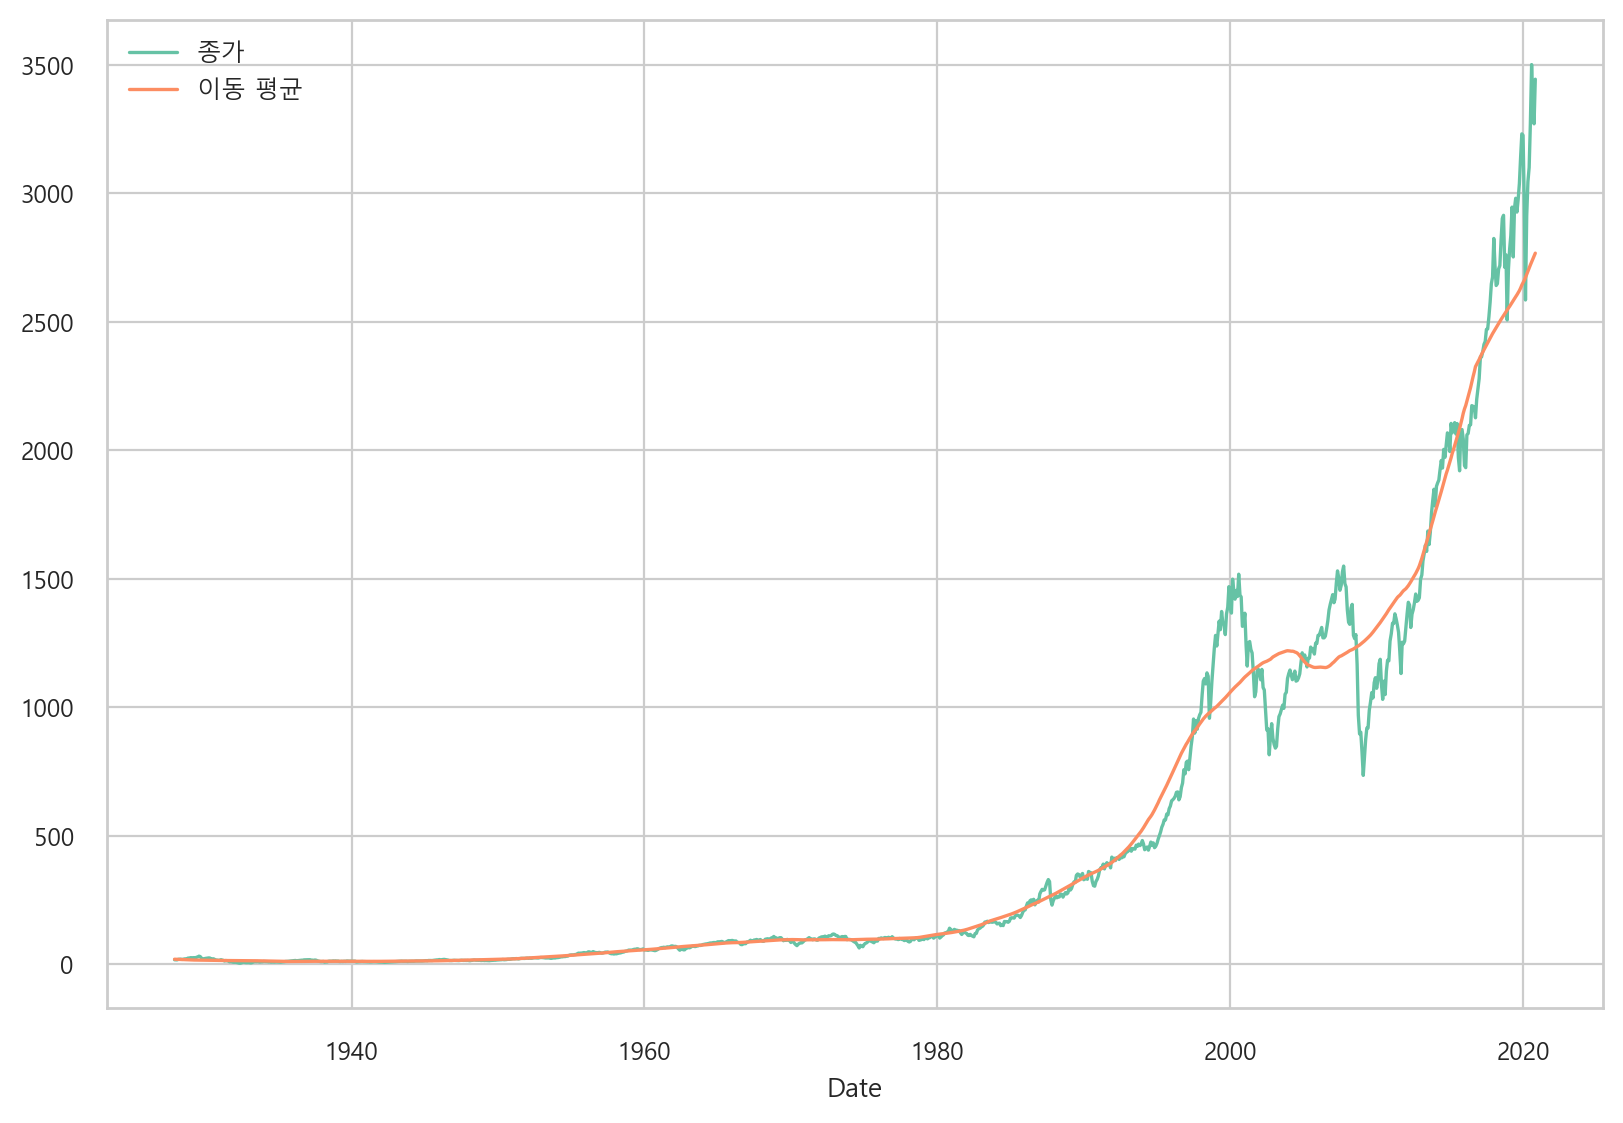

In [ ]:

# 이동 평균 구하기
trend_500 = snp_500_month_end["Adj Close"]
trend_500_trend = trend_500.rolling(window=100, center=True, min_periods=6).mean()

fig, ax = plt.subplots()

sns.lineplot(x = trend_500.index.astype("datetime64"),
             y = trend_500.values,
             label = "종가")

sns.lineplot(x = trend_500_trend.index.astype("datetime64"),
             y = trend_500_trend.values,
             label = "이동 평균")

In [ ]:

# 독립 변수와 종속 변수 설정
X = snp_500_month_end[['time']]
y = trend_500_trend

X = [0, 1, 2, 3, 4]
degree 가 1 인경우
X_ploy = [[1,0], [1,1], [1,2], [1,3], [1,4]]
degree 가 2 인경우
X_ploy = [[1,0,0], [1,1,1], [1,2,4], [1,3,9], [1,4,16]] ...

즉 다항 특성은 [1,x,x^2,x^3 ...]

In [ ]:
def make_polys(X,degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    return X_poly

dict_date_afterword = {}
for i in range(1, 121): # 추가로 10년간 데이터
    dict_date_afterword[X.index[-1] + i] = int(X.iloc[-1]) + i

df_after = pd.DataFrame(data=dict_date_afterword.values(),
                        index=dict_date_afterword.keys(),
                        columns=["time"])
                    

# 새로운 날짜 생성
new_dates = pd.date_range(start=X.index[-1], periods=100, freq='D')

# 새로운 날짜에 해당하는 값 계산
new_values = pd.Series(range(int(X.iloc[-1]), int(X.iloc[-1]) + 100), index=new_dates)

# DataFrame 생성
df_after = pd.DataFrame({'time': new_values})


In [ ]:
# # 결과 플롯팅
# df_after

# # 선형 회귀 모델 학습
# for i in range(1,6):
    
#     model = LinearRegression()
#     model.fit(make_polys(X,i), y)
#     pred = model.predict(make_polys(X,i))
#     pred_after = model.predict(make_polys(df_after,i))

#     fig, ax = plt.subplots()

#     sns.lineplot(x = trend_500.index.astype("datetime64"),
#                  y = trend_500.values,
#                  alpha = 0.3,
#                  label = "종가")

#     sns.lineplot(x = trend_500.index.astype("datetime64"),
#                  y = trend_500_trend.values,
#                  alpha = 0.3,
#                  label = "이동 평균")
#     sns.lineplot(x = trend_500.index.astype("datetime64"),
#              y = pred,
#              label=f'이동 평균 예측(다항 식 갯수 {i})')
    
#     sns.lineplot(x = df_after.index.astype("datetime64"),
#              y = pred_after,
#              label=f'이후의 예측')
    


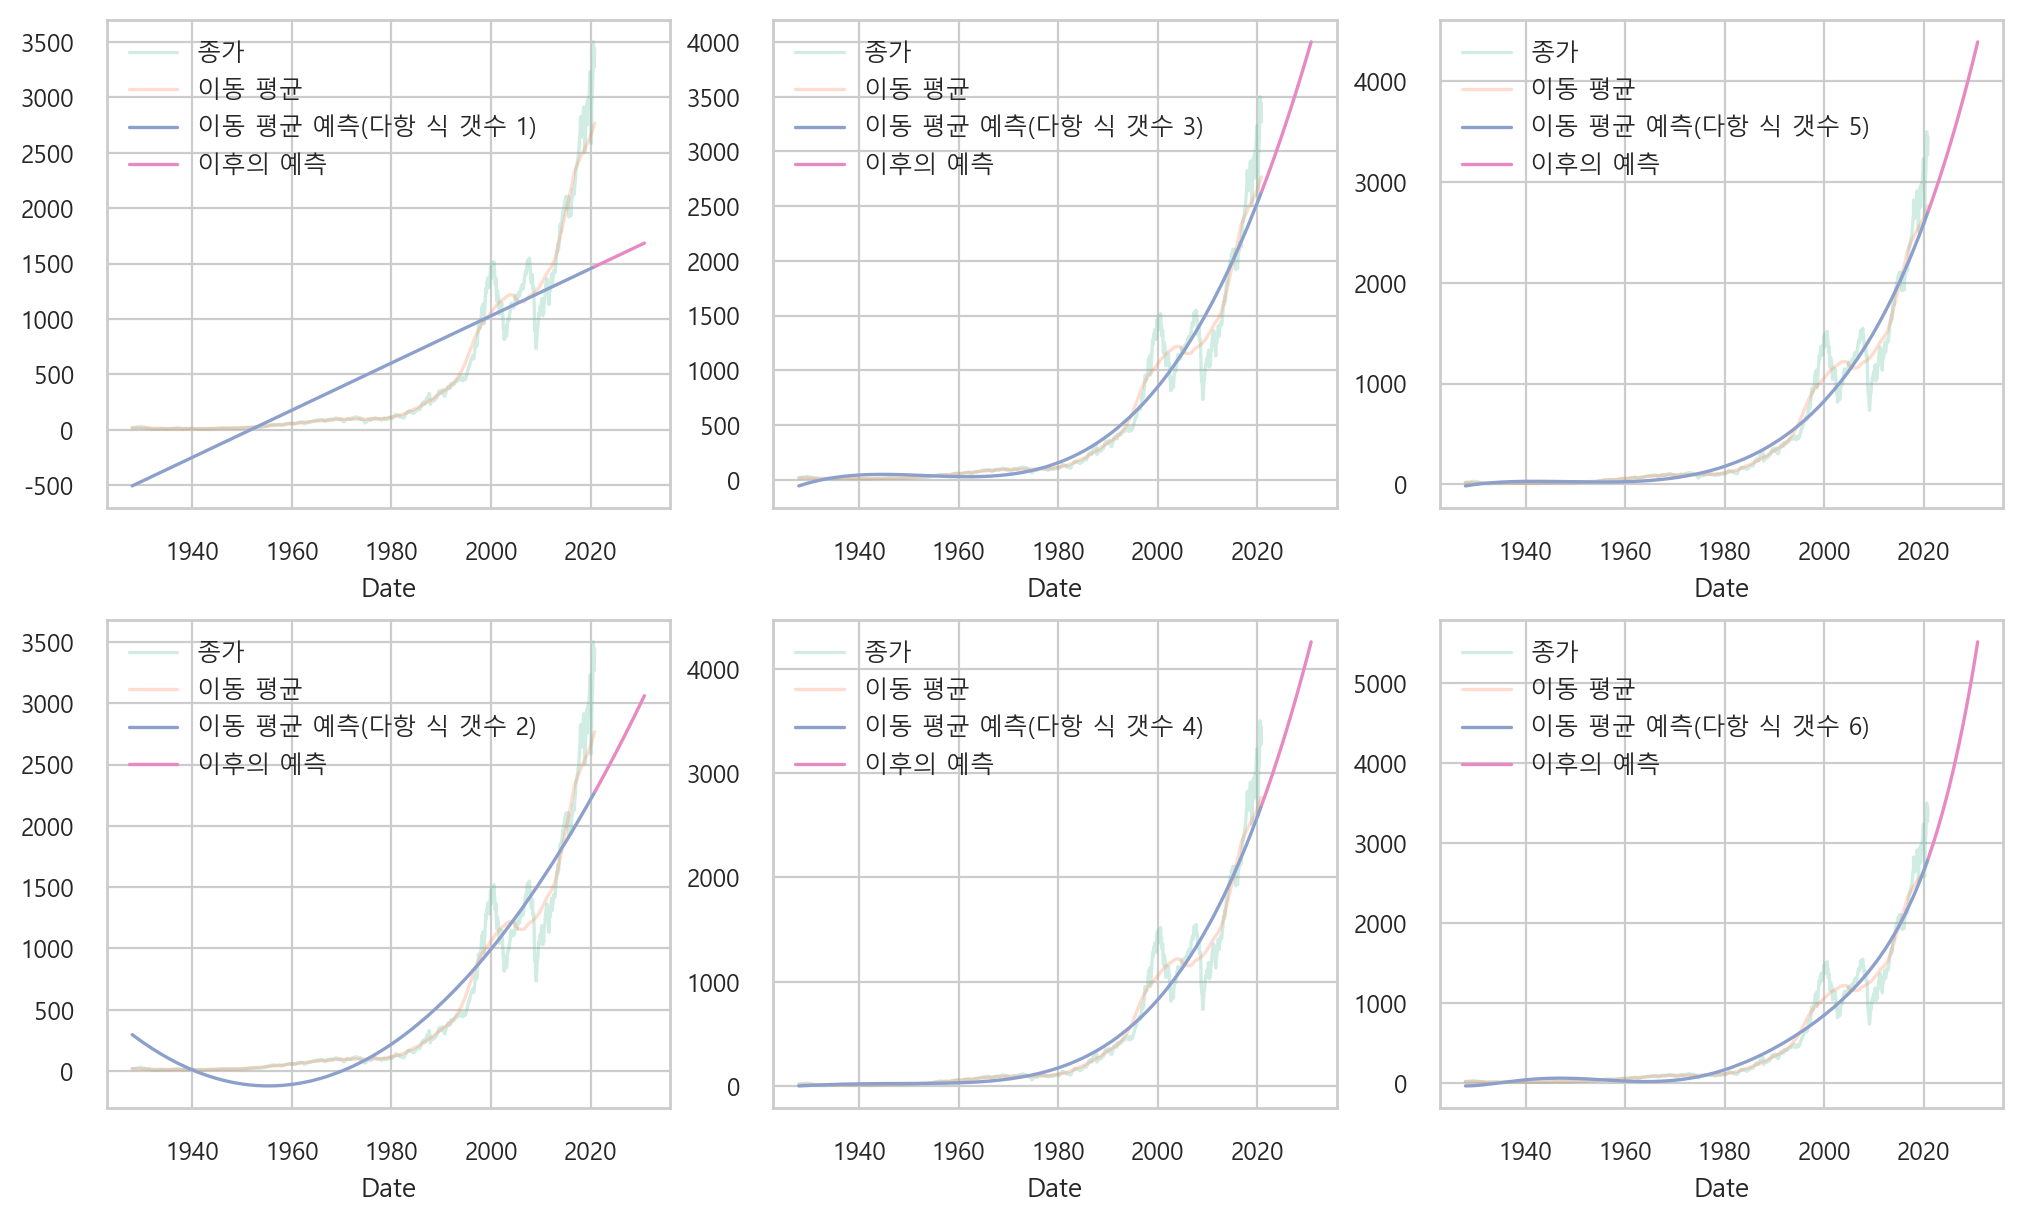

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(10,6))
ind_list = [[j,k] for k in range(3) for j in range(2)]

for i in range(1,7):
    model = LinearRegression()
    model.fit(make_polys(X,i), y)
    pred = model.predict(make_polys(X,i))
    pred_after = model.predict(make_polys(df_after,i))

    r = ind_list[i-1][0]
    c = ind_list[i-1][1]
    

    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500.values,
                 alpha = 0.3,
                 label = "종가",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500_trend.values,
                 alpha = 0.3,
                 label = "이동 평균",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                y = pred,
                label=f'이동 평균 예측(다항 식 갯수 {i})',
                ax=ax[r][c])
    sns.lineplot(x = df_after.index.astype("datetime64"),
                y = pred_after,
                label=f'이후의 예측',
                ax=ax[r][c])


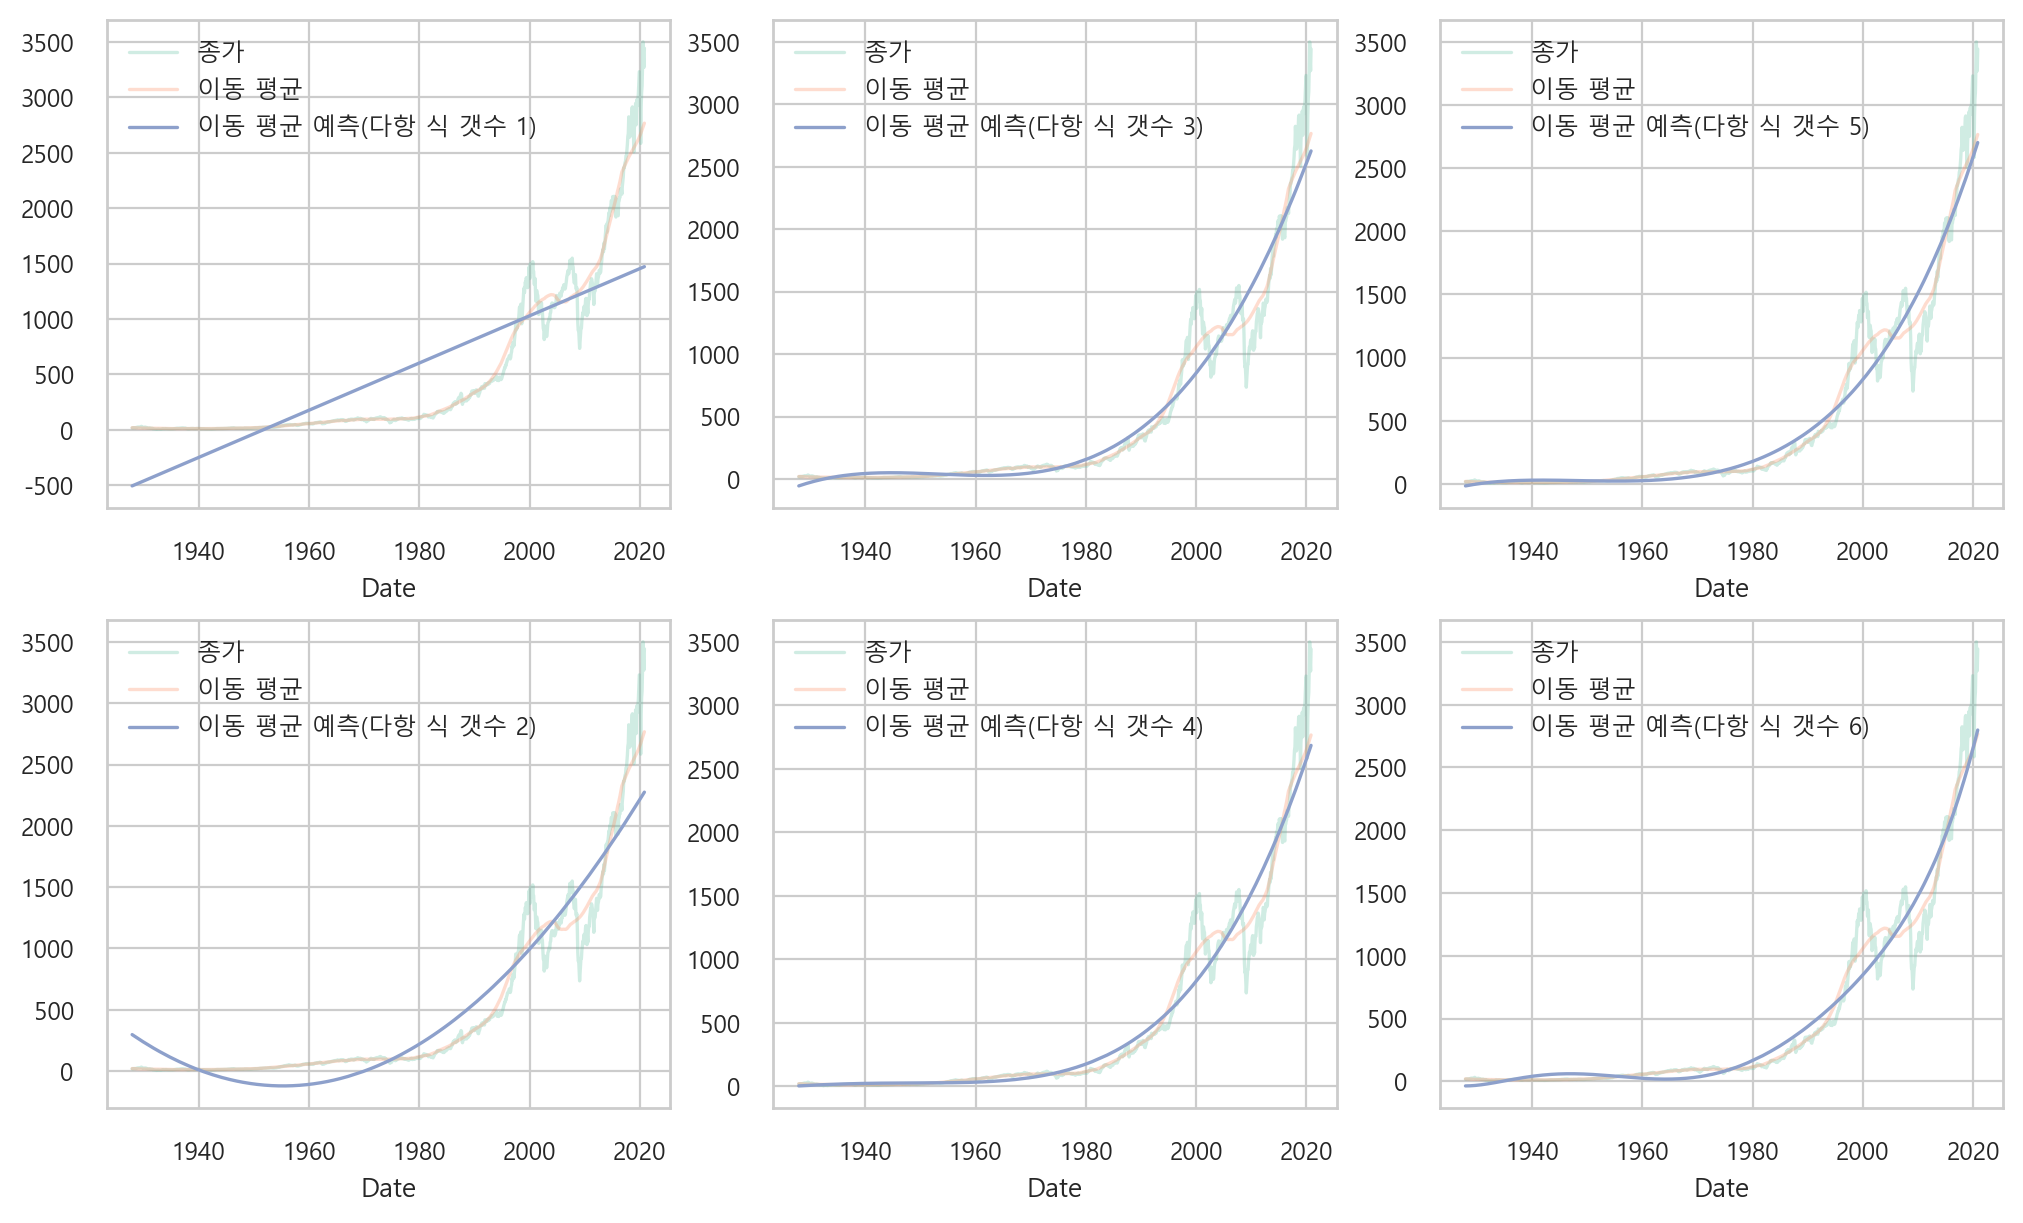

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(10,6))
ind_list = [[j,k] for k in range(3) for j in range(2)]

for i in range(1,7):
    model = LinearRegression()
    model.fit(make_polys(X,i), y)
    pred = model.predict(make_polys(X,i))

    r = ind_list[i-1][0]
    c = ind_list[i-1][1]
    

    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500.values,
                 alpha = 0.3,
                 label = "종가",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
                 y = trend_500_trend.values,
                 alpha = 0.3,
                 label = "이동 평균",
                 ax=ax[r][c])
    sns.lineplot(x = trend_500.index.astype("datetime64"),
             y = pred,
             label=f'이동 평균 예측(다항 식 갯수 {i})',
                 ax=ax[r][c])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

X = pd.DataFrame(np.arange(0,100), columns=["time"])

def make_as_poly(X,degree):
    model_poly = PolynomialFeatures(degree=degree)
    X_poly = model_poly.fit_transform(X)
    return np.int64(X_poly)

for i in range(1,6):
    print(f"degree {i} 일때 3 번째:",make_as_poly(X, degree=i)[3])

degree 1 일때 3 번째: [1 3]
degree 2 일때 3 번째: [1 3 9]
degree 3 일때 3 번째: [ 1  3  9 27]
degree 4 일때 3 번째: [ 1  3  9 27 81]
degree 5 일때 3 번째: [  1   3   9  27  81 243]


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

In [ ]:
snp_500 = pd.read_csv('../datas/study_data/snp500_history.csv',
                      index_col='Date',
                      parse_dates=['Date'])

snp_500_month_end = snp_500.resample('M').last()

snp_500_month_end.index = snp_500_month_end.index.to_period()
snp_500_month_end['time'] = np.arange(len(snp_500_month_end.index))


trend_500 = snp_500_month_end["Adj Close"]

# 추세 구하는 함수
trend_500_trend = snp_500_month_end["Adj Close"].rolling(
    window=100,
    center=True,
    min_periods=6,
).mean()

<AxesSubplot: xlabel='Date'>

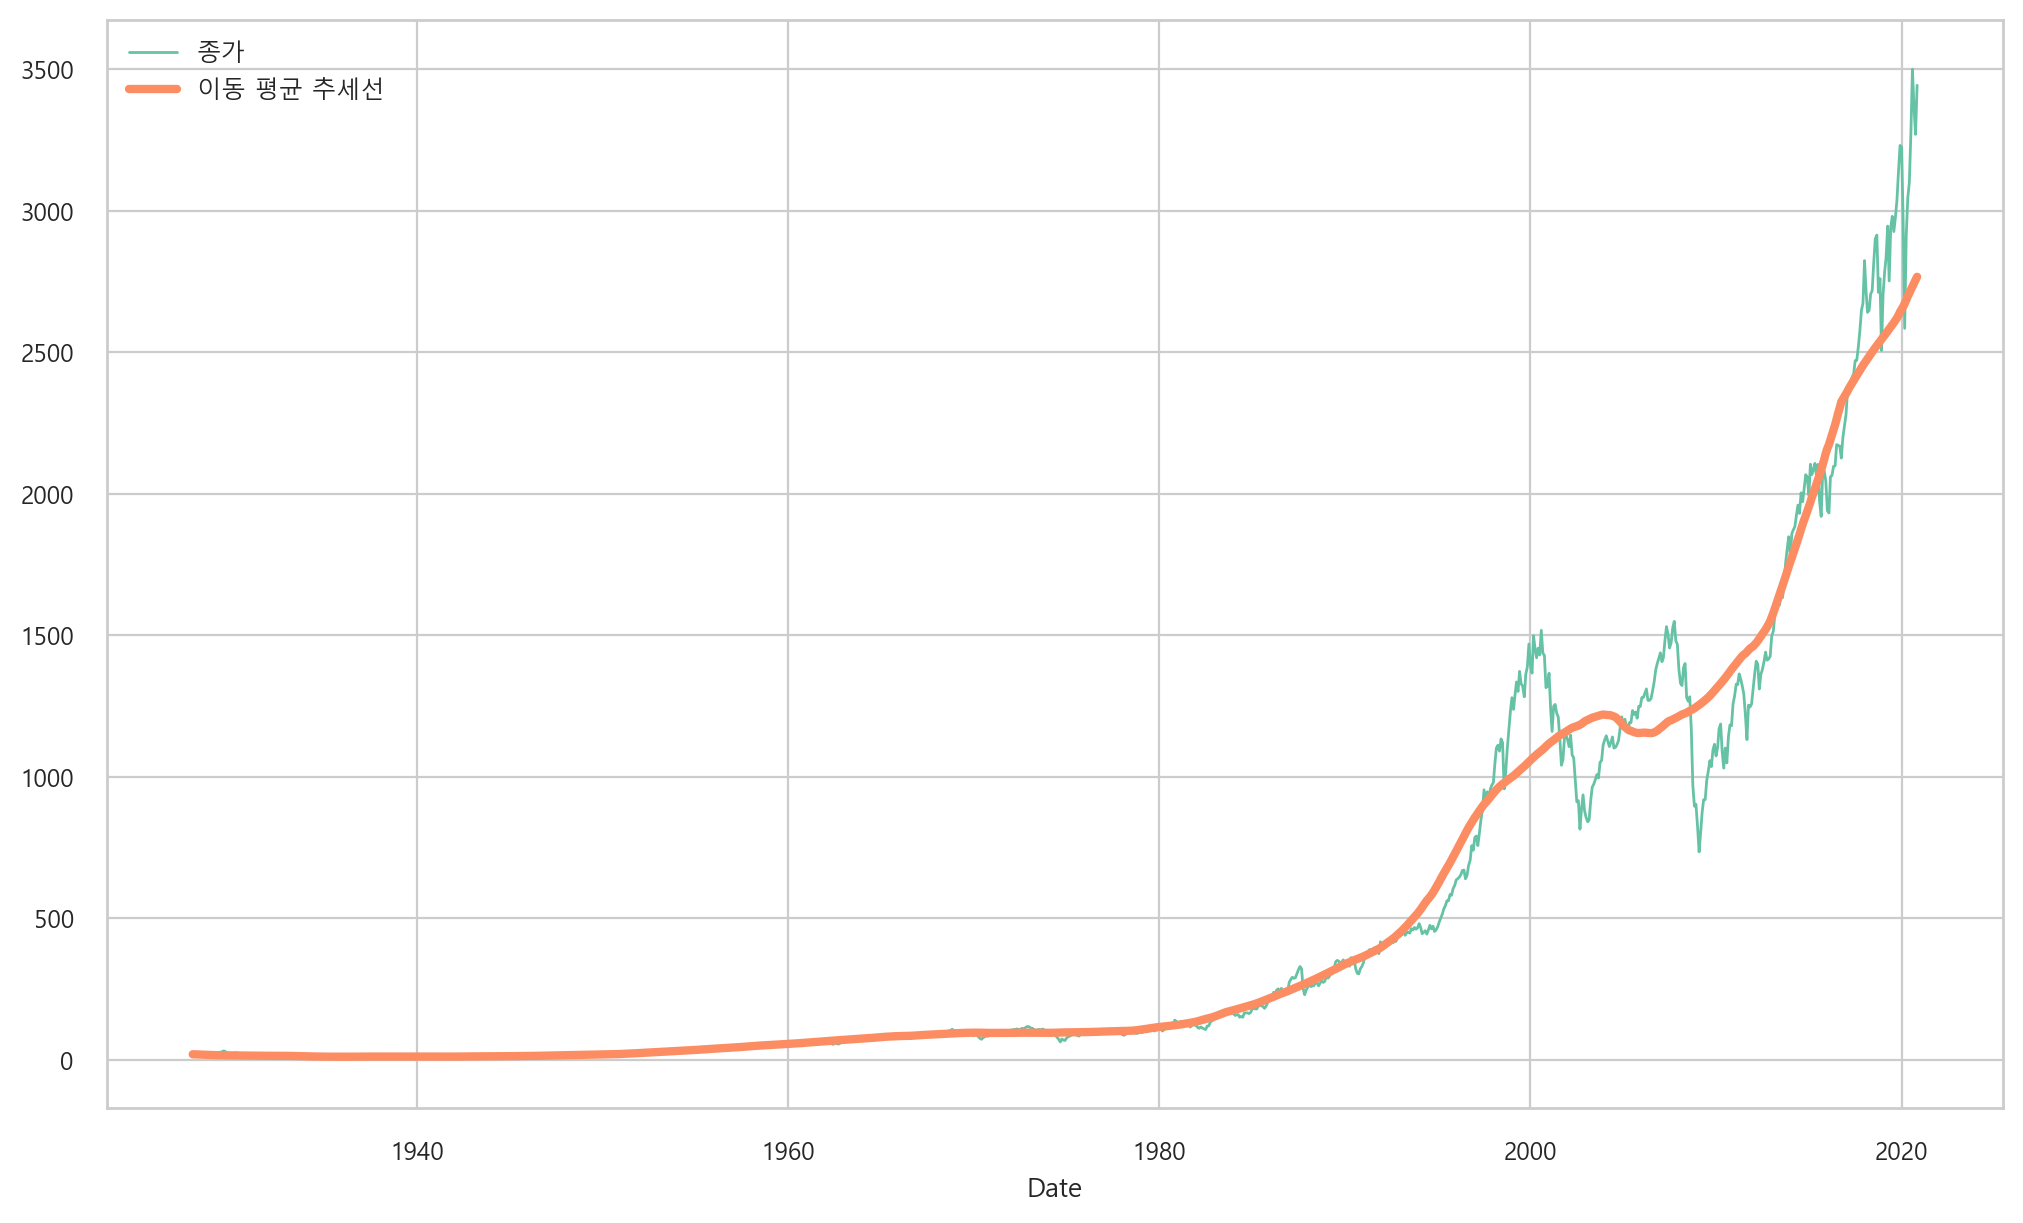

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

sns.lineplot(x=trend_500.index.astype("datetime64"),
             y=trend_500.values,
             label="종가",
             linewidth = 1)

sns.lineplot(x=trend_500_trend.index.astype("datetime64"),
             y=trend_500_trend.values,
             label="이동 평균 추세선",
             linewidth = 3)

# sns.lineplot(data=trend_500_trend,ax=ax)
# trend_500_trend.plot(ax=ax, linewidth = 3, legend="legend", alpha = 0.3)